# Diamond Pricing

| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

# Libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
#from pandas_profiling import ProfileReport

In [43]:
diamond = pd.read_csv('diamonds.csv')

In [44]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


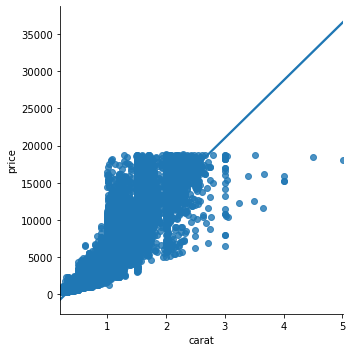

In [45]:
sns.lmplot(data=diamond,x='carat',y='price')

In [46]:
transf_col = diamond.columns
transf_col = transf_col.drop(['cut','color','clarity'])

In [47]:
def to_log(x):
    return np.log2(x) if x != 0 else 0

In [48]:
for column in transf_col:
    diamond[column] = diamond[column].map(to_log)

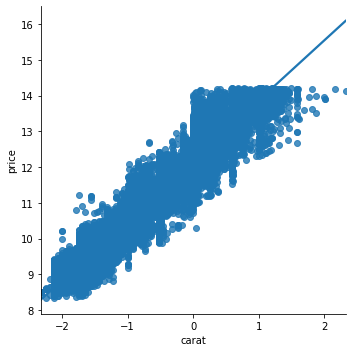

In [49]:
sns.lmplot(data=diamond,x='carat',y='price')

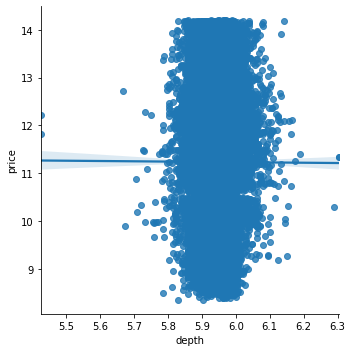

In [53]:
sns.lmplot(data=diamond,x='depth',y='price')

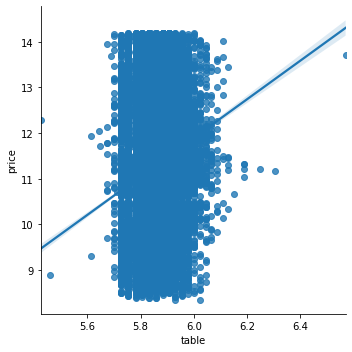

In [54]:
sns.lmplot(data=diamond,x='table',y='price')

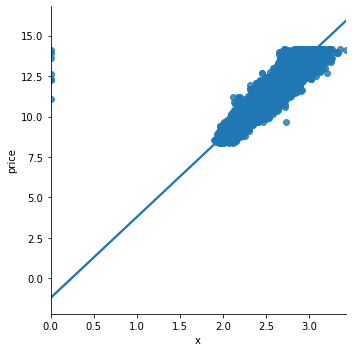

In [50]:
sns.lmplot(data=diamond,x='x',y='price')

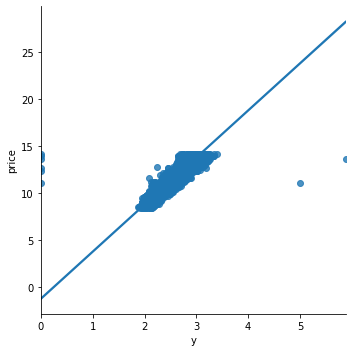

In [52]:
sns.lmplot(data=diamond,x='y',y='price')

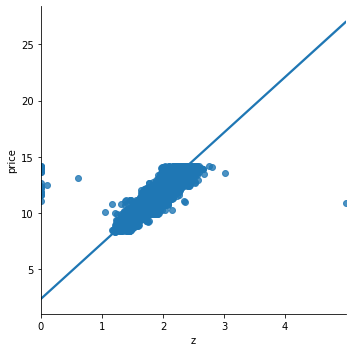

In [51]:
sns.lmplot(data=diamond,x='z',y='price')

# Adjusting categorical values

In [4]:
diamond['new_clarity'] = diamond['clarity'].replace({'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7})
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,new_clarity
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,5


In [5]:
diamond['new_color'] = diamond['color'].replace({'D':6, 'E':5,'F':4,'G':3,'H':2,'I':1,'J':0})
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,new_clarity,new_color
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,5,0


In [6]:
diamond['new_cut']= diamond['cut'].replace({'Fair':0,'Good':1,'Very Good': 2, 'Premium':3,'Ideal':4})
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,new_clarity,new_color,new_cut
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5,3
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5,1
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,3
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,5,0,2


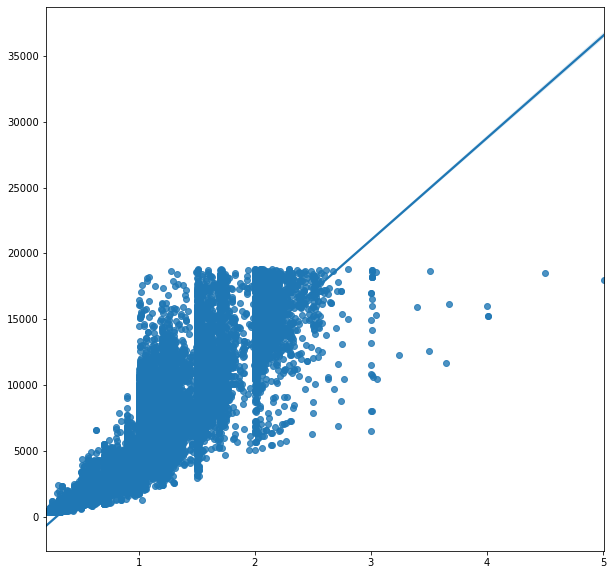

In [7]:
plt.figure(figsize=(10, 10))
sns.regplot(np.array(diamond.carat,dtype=np.float64), np.array(diamond.price, dtype=np.int64), scatter=True)

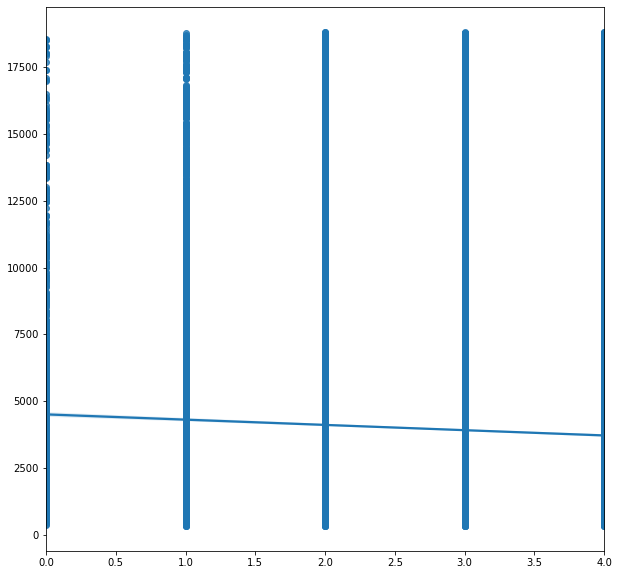

In [8]:
plt.figure(figsize=(10, 10))
sns.regplot(np.array(diamond.new_cut,dtype=np.float64), np.array(diamond.price, dtype=np.int64), scatter=True)

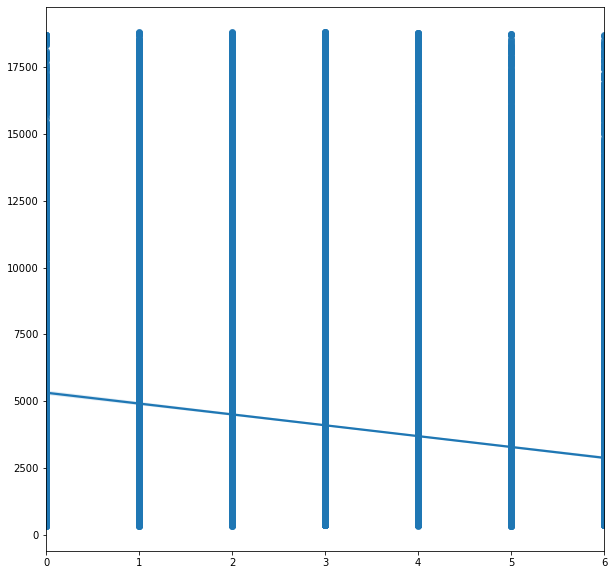

In [9]:
plt.figure(figsize=(10, 10))
sns.regplot(np.array(diamond.new_color,dtype=np.float64), np.array(diamond.price, dtype=np.int64), scatter=True)

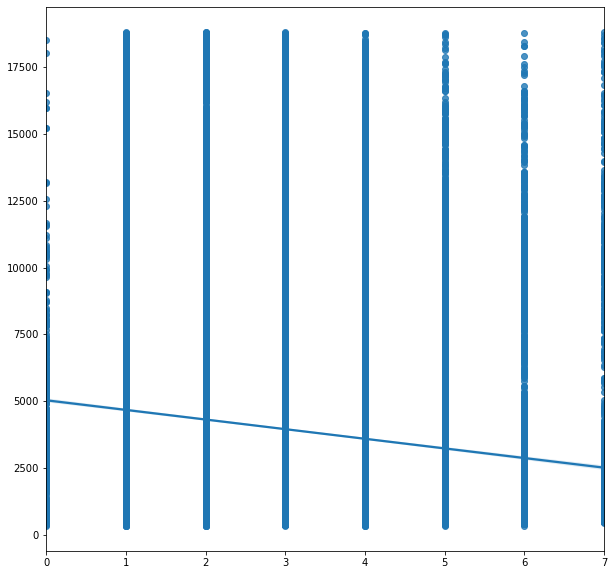

In [10]:
plt.figure(figsize=(10, 10))
sns.regplot(np.array(diamond.new_clarity,dtype=np.float64), np.array(diamond.price, dtype=np.int64), scatter=True)

# Checking null/zero

In [11]:
diamond['z'].mean()

3.5386477319166323

In [12]:
diamond['z'].median()

3.52

In [13]:
diamond.loc[(diamond['x'] == 0) | (diamond['y'] == 0) | (diamond['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z,new_clarity,new_color,new_cut
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,1,3,3
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0,2,3
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,1,3,3
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,1,4,3
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0,3,1
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,1,4,4
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,3,2,2
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,3,3,4
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,4,3,0
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,1,2,3


In [14]:
diamond['x'].replace(to_replace=0,value=round(diamond['x'].mean(),2),inplace=True)

In [15]:
diamond['y'].replace(to_replace=0,value=round(diamond['y'].mean(),2),inplace=True)

In [16]:
diamond['z'].replace(to_replace=0,value=round(diamond['z'].mean(),2),inplace=True)

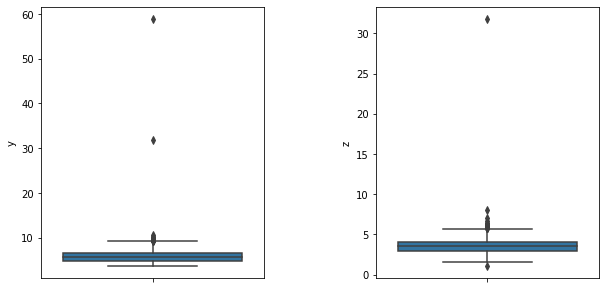

In [17]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamond.y, ax=ax[0])
sns.boxplot(y=diamond.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

In [18]:
diamond.describe()

,carat,depth,table,price,x,y,z,new_clarity,new_color,new_cut
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.00000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.731531,5.735036,3.53995,3.055456,3.407254,2.906416
std,0.474126,1.430026,2.233450,3989.333861,1.119825,1.143582,0.70355,1.645542,1.699858,1.116568
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.07000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.91000,2.000000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.53000,3.000000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.04000,4.000000,5.000000,4.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.80000,7.000000,6.000000,4.000000


In [19]:
diamond.loc[diamond['y'] > 30]

,carat,cut,color,clarity,depth,table,price,x,y,z,new_clarity,new_color,new_cut
21828,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06,1,2,3
44603,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12,4,5,4


In [140]:
diamond['y'].replace(to_replace=[58.9,31.8],value=round(diamond['y'].mean(),2),inplace=True)

In [141]:
diamond.loc[diamond['z'] > 10]

,carat,cut,color,clarity,depth,table,price,x,y,z,new_clarity,new_color,new_cut


In [143]:
diamond['z'].replace(to_replace=[19.73,11.42,31.8],value=round(diamond['z'].mean(),2),inplace=True)

# Pandas Profiling Pre-Cleaning

In [23]:
#profile = ProfileReport(diamond, minimal=True)

In [24]:
#profile

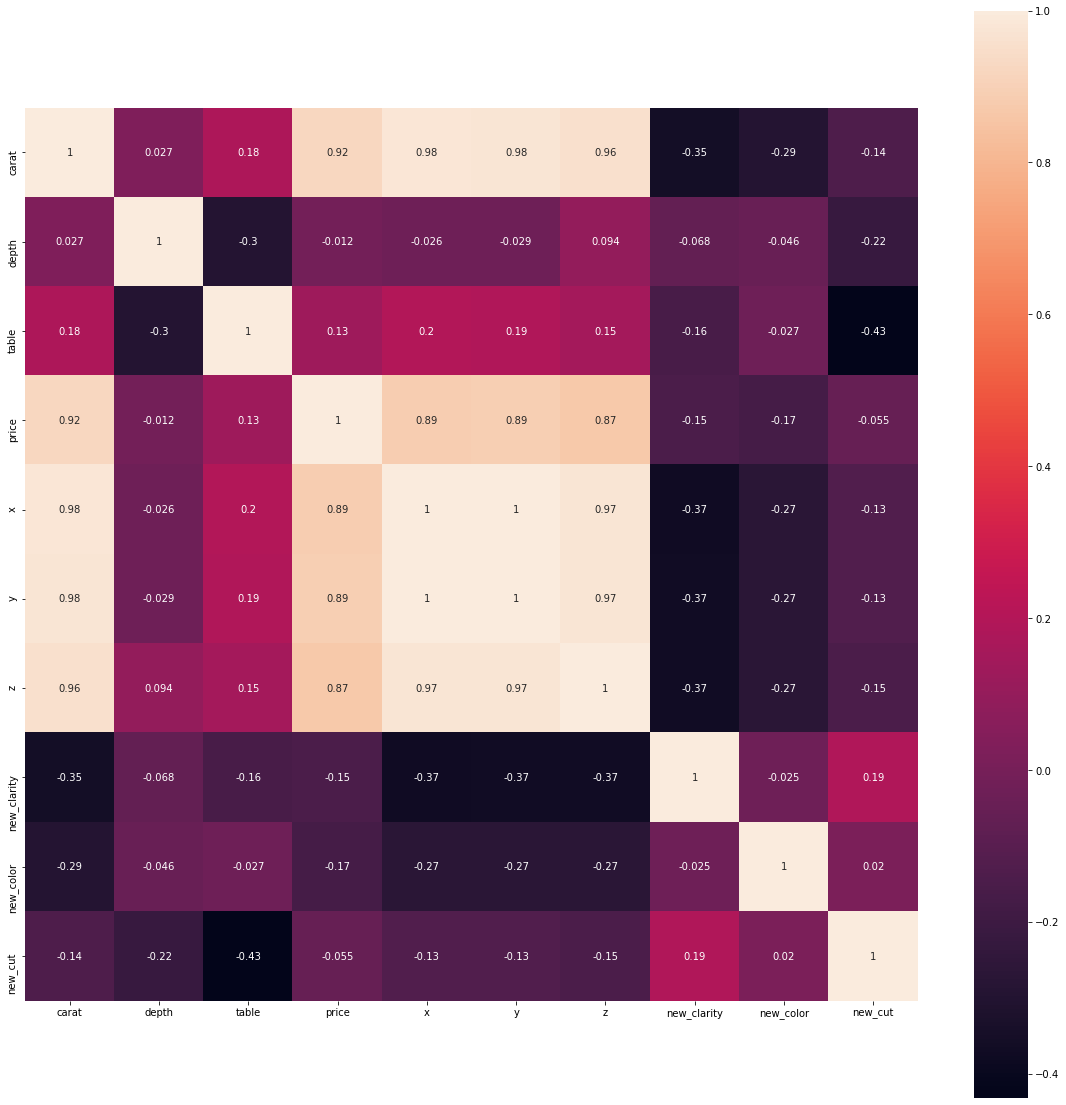

In [25]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamond.corr(), annot=True, square=True)

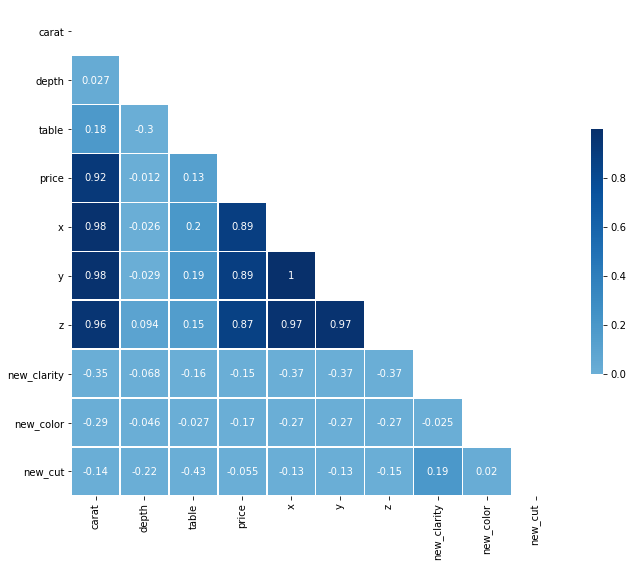

In [26]:
corr = diamond.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Blues', vmin=.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

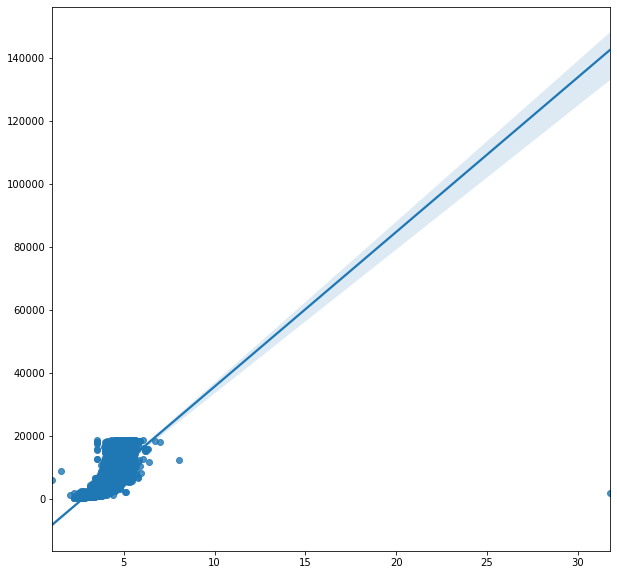

In [27]:
plt.figure(figsize=(10, 10))
sns.regplot(np.array(diamond.z,dtype=np.float64), np.array(diamond.price, dtype=np.int64), scatter=True)

# Linear Regression

Only using `carat`

In [252]:
y_observed = diamond['price']

In [253]:
model = LinearRegression()

X = diamond[['carat']]
y = diamond['price']

model.fit(X, y)

LinearRegression()

In [30]:
y_predicted = model.predict(diamond[['carat']])

In [31]:
#list(zip(y_observed, y_predicted))

In [32]:
r2_score(y_observed, y_predicted)

0.8504268875149481

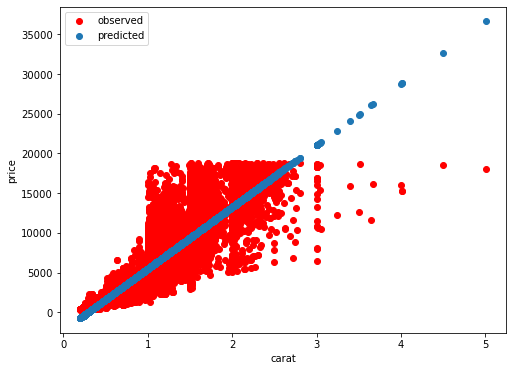

In [33]:
plt.figure(figsize=(8,6))
plt.xlabel('carat')
plt.ylabel('price')
plt.scatter(X, y, color='red', label='observed')
    
plt.scatter(X, model.predict(X), label='predicted')

plt.legend()

# Multiple Linear Regression

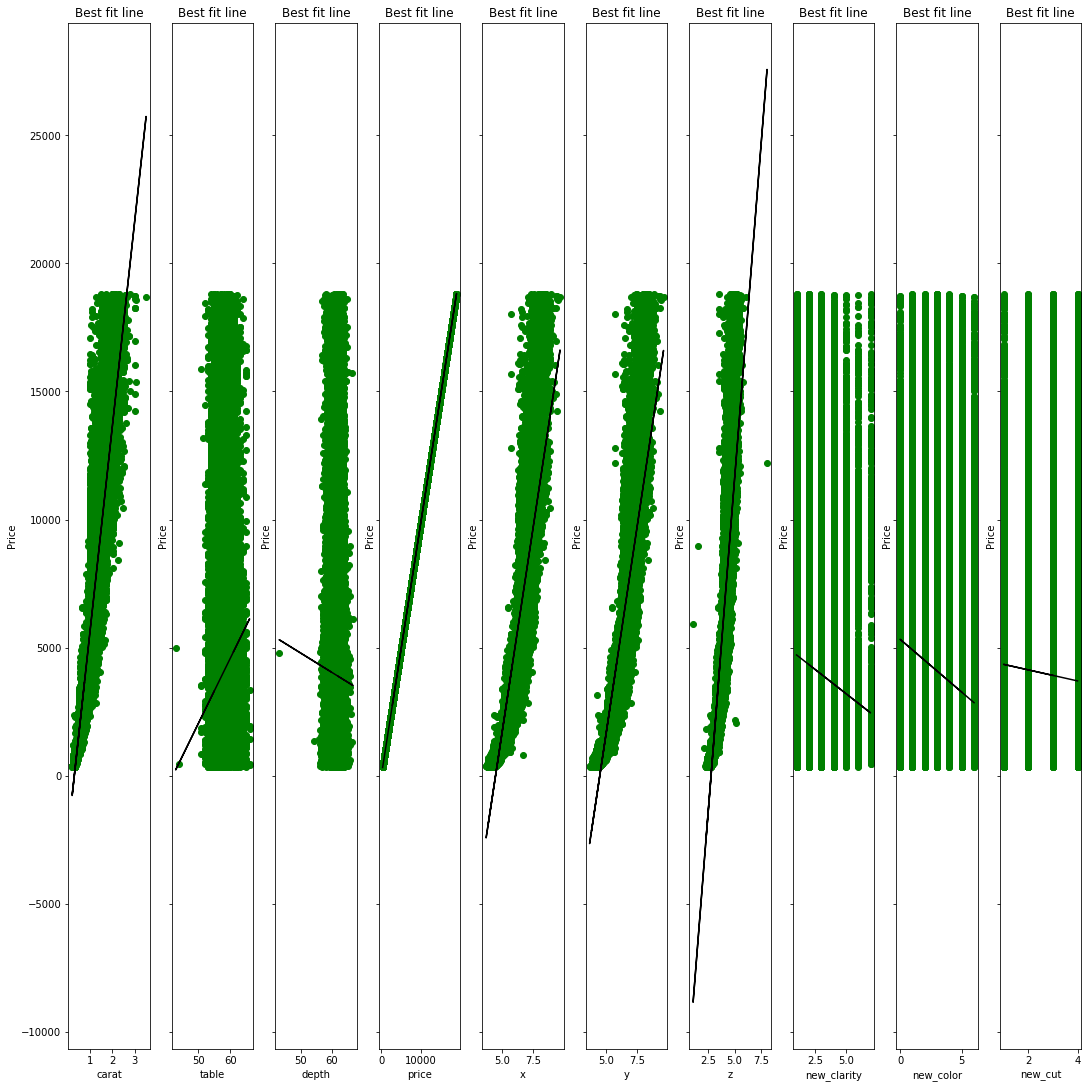

In [145]:
copy_diamond = diamond[['carat', 'table','depth', 'price', 'x', 'y','z', 'new_clarity', 'new_color', 'new_cut']]

fig, axes = plt.subplots(1,len(copy_diamond.columns.values),sharey=True,constrained_layout=True,figsize=(15,15))

for i,e in enumerate(copy_diamond.columns):
    model.fit(copy_diamond[e].values[:,np.newaxis], y.values)
    axes[i].set_title("Best fit line")
    axes[i].set_xlabel(str(e))
    axes[i].set_ylabel('Price')
    axes[i].scatter(copy_diamond[e].values[:,np.newaxis], y,color='g')
    axes[i].plot(copy_diamond[e].values[:,np.newaxis], 
    model.predict(copy_diamond[e].values[:,np.newaxis]),color='k')

# Carat + Color

In [35]:
model = LinearRegression()

X = diamond[['carat','new_color']]
y = diamond['price']

model.fit(X, y)

y_predicted = model.predict(diamond[['carat','new_color']])

In [36]:
model.score(X, y)

0.8605373279283239

In [37]:
#list(zip(y_observed, y_predicted))

# Carat + Clarity

In [38]:
model = LinearRegression()

X = diamond[['carat','new_clarity']]
y = diamond['price']

model.fit(X, y)

y_predicted = model.predict(diamond[['carat','new_clarity']])

In [39]:
model.score(X, y)

0.8864972834532986

# Carat + Cut

In [40]:
model = LinearRegression()

X = diamond[['carat','new_cut']]
y = diamond['price']

model.fit(X, y)

y_predicted = model.predict(diamond[['carat','new_cut']])

In [41]:
model.score(X, y)

0.8554865449918615

# Carat + Table

In [42]:
model = LinearRegression()

X = diamond[['carat','table']]
y = diamond['price']

model.fit(X, y)

y_predicted = model.predict(diamond[['carat','table']])
model.score(X, y)

0.852058253513067

# Carat + Depth

In [43]:
model = LinearRegression()

X = diamond[['carat','depth']]
y = diamond['price']

model.fit(X, y)

y_predicted = model.predict(diamond[['carat','depth']])
model.score(X, y)

0.8517972363062056

# Carat + Color + Clarity

In [44]:
model = LinearRegression()

X = diamond[['carat','new_color','new_clarity']]
y = diamond['price']

model.fit(X, y)

y_predicted = model.predict(diamond[['carat','new_color','new_clarity']])
model.score(X, y)

0.9031474667115716

# Carat + Color + Clarity + Cut

In [45]:
model = LinearRegression()

X = diamond[['carat','new_color','new_clarity','new_cut']]
y = diamond['price']

model.fit(X, y)

y_predicted = model.predict(diamond[['carat','new_color','new_clarity','new_cut']])
model.score(X, y)

0.9049549496364835

# Carat + Color + Clarity + Cut + z

In [46]:
model = LinearRegression()

X = diamond[['carat','new_color','new_clarity','new_cut','z']]
y = diamond['price']

model.fit(X, y)

y_predicted = model.predict(diamond[['carat','new_color','new_clarity','new_cut','z']])
model.score(X, y)

0.9065980810573504

# Carat + Color + Clarity + Cut + Depth

In [47]:
model = LinearRegression()

X = diamond[['carat','new_color','new_clarity','new_cut','depth']]
y = diamond['price']

model.fit(X, y)

y_predicted = model.predict(diamond[['carat','new_color','new_clarity','new_cut','depth']])
model.score(X, y)

0.9050574477062459

# Carat + Color + Clarity + Cut + Depth + Table

In [48]:
model = LinearRegression()

X = diamond[['carat','new_color','new_clarity','new_cut','depth','table']]
y = diamond['price']

model.fit(X, y)

y_predicted = model.predict(diamond[['carat','new_color','new_clarity','new_cut','depth','table']])
model.score(X, y)

0.905179963370918

# Carat + x + y + z

In [49]:
model = LinearRegression()

X = diamond[['carat','z']]
y = diamond['price']

model.fit(X, y)

y_predicted = model.predict(diamond[['carat','z']])
model.score(X, y)

0.8542651649977853

In [50]:
plot_model = pd.DataFrame(columns=['Price','Type'])

In [51]:
plot_model['Price'] = y_observed

In [52]:
plot_model['Type'] = 'Observed'

In [53]:
plot_model

,Price,Type
0,326,Observed
1,327,Observed
2,334,Observed
3,335,Observed
4,336,Observed
...,...,...
48935,2757,Observed
48936,2757,Observed
48937,2757,Observed
48938,2757,Observed


In [54]:
#plot_model = pd.concat([plot_model,X],axis=1)

In [55]:
#plot2 = pd.concat([plot2,X],axis=1)

NameError: name 'plot2' is not defined

In [ ]:
#plot2['Price'] = y_predicted

In [ ]:
#plot2['Type'] = 'Predicted'

In [ ]:
#pd.concat()

In [ ]:
#final_plot = pd.concat([plot_model,plot2])

In [ ]:
#final_plot

NameError: name 'final_plot' is not defined

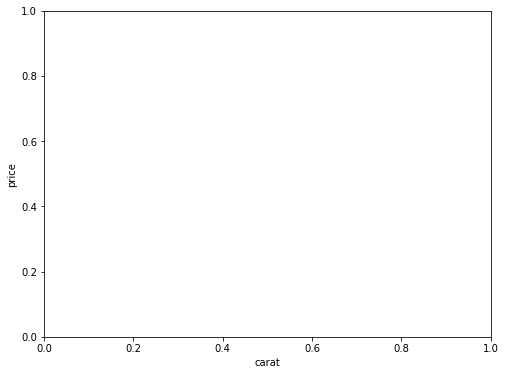

In [56]:
plt.figure(figsize=(8,6))
plt.xlabel('carat')
plt.ylabel('price')
plt.scatter(final_plot['carat'], final_plot['Price'], color='red', )
    
#plt.scatter(final_plot['carat'], final_plot['Price'], label='predicted')

plt.legend()

# Final decision

In [264]:
X = diamond[['carat']]
y = diamond['price']

x_train, x_test, y_train, y_test = train_test_split(X,y)


model = LinearRegression()
scaler = StandardScaler()

scaler.fit(x_train)


std_x_train = scaler.transform(x_train)

model.fit(std_x_train,y_train)

std_x_test = scaler.transform(x_test)
predict = model.predict(std_x_test)

np.sqrt(mean_squared_error(y_test, predict))

1431.6237178431545

In [261]:
X = diamond[['carat','new_color','new_clarity','new_cut']]
y = diamond['price']

x_train, x_test, y_train, y_test = train_test_split(X,y)


model = LinearRegression()
scaler = StandardScaler()

scaler.fit(x_train)


std_x_train = scaler.transform(x_train)

model.fit(std_x_train,y_train)

std_x_test = scaler.transform(x_test)
predict = model.predict(std_x_test)

np.sqrt(mean_squared_error(y_test, predict))

1151.6352880205159

In [262]:
X = diamond[['carat','new_color','new_clarity','new_cut','z']]
y = diamond['price']

x_train, x_test, y_train, y_test = train_test_split(X,y)

model = LinearRegression()
scaler = StandardScaler()

scaler.fit(x_train)
std_x_train = scaler.transform(x_train)

model.fit(std_x_train,y_train)

std_x_test = scaler.transform(x_test)
predict = model.predict(std_x_test)

np.sqrt(mean_squared_error(y_test, predict))

1107.0263515284914

In [59]:
X = diamond[['depth','carat']]
y = diamond['price']

x_train, x_test, y_train, y_test = train_test_split(X,y)

model = LinearRegression()
scaler = StandardScaler()

scaler.fit(x_train)
std_x_train = scaler.transform(x_train)

model.fit(std_x_train,y_train)

std_x_test = scaler.transform(x_test)
predict = model.predict(std_x_test)

np.sqrt(mean_squared_error(y_test, predict))

1564.7332020771098

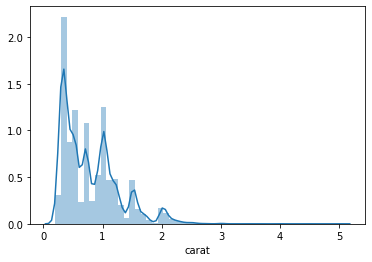

In [60]:
sns.distplot(diamond['carat'])

### Excluir new_cut = 0 do notebook

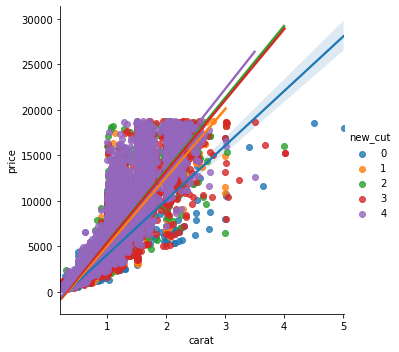

In [61]:
sns.lmplot(x='carat',y='price',data=diamond,hue='new_cut')

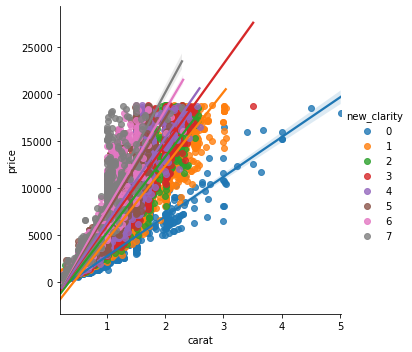

In [62]:
sns.lmplot(x='carat',y='price',data=diamond,hue='new_clarity')

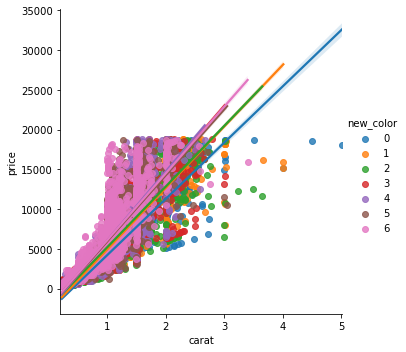

In [63]:
sns.lmplot(x='carat',y='price',data=diamond,hue='new_color')

In [164]:
diamond.drop(diamond.loc[(diamond['new_clarity'] == 0) | (diamond['new_cut'] == 0)].index,inplace=True)

In [171]:
X = diamond_b[['carat','new_clarity','new_cut']]
y = diamond_b['price']

x_train, x_test, y_train, y_test = train_test_split(X,y)

model = LinearRegression()
scaler = StandardScaler()

scaler.fit(x_train)

std_x_train = scaler.transform(x_train)

model.fit(std_x_train,y_train)

std_x_test = scaler.transform(x_test)
predict = model.predict(std_x_test)

np.sqrt(mean_squared_error(y_test, predict))

1244.2437030631233

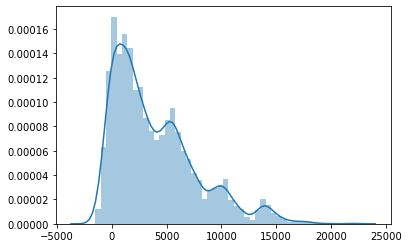

In [167]:
sns.distplot(predict)

In [196]:
X = diamond[['carat','new_color','new_clarity','new_cut','z']]
y = diamond['price']

x_train, x_test, y_train, y_test = train_test_split(X,y)

model = LinearRegression()
scaler = StandardScaler()

scaler.fit(x_train)

std_x_train = scaler.transform(x_train)

model.fit(std_x_train,y_train)

std_x_test = scaler.transform(x_test)
predict = model.predict(std_x_test)

np.sqrt(mean_squared_error(y_test, predict))

1105.328420003509

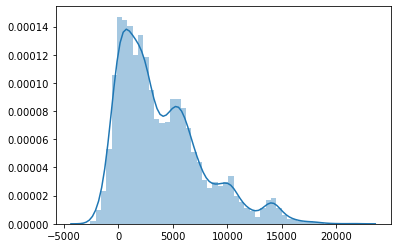

In [94]:
sns.distplot(predict)

In [256]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [257]:
pca.components_

array([[ 0.09725739, -0.98559681,  0.02093251, -0.01482822,  0.13594805]])

In [258]:
X

,carat,new_color,new_clarity,new_cut,z
0,0.21,5,2,3,2.31
1,0.23,5,4,1,2.31
2,0.29,1,3,3,2.63
3,0.31,0,1,1,2.75
4,0.24,0,5,2,2.48
...,...,...,...,...,...
48935,0.72,6,2,3,3.58
48936,0.72,6,2,4,3.50
48937,0.72,6,2,1,3.61
48938,0.70,6,2,2,3.56


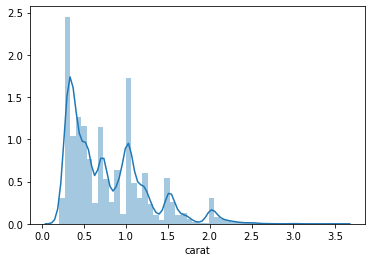

In [110]:
sns.distplot(diamond['carat'])

In [97]:
X

,carat,new_color,new_clarity,new_cut
0,0.21,5,2,3
1,0.23,5,4,1
2,0.29,1,3,3
3,0.31,0,1,1
4,0.24,0,5,2
...,...,...,...,...
48935,0.72,6,2,3
48936,0.72,6,2,4
48937,0.72,6,2,1
48938,0.70,6,2,2


In [136]:
diamond['z'].describe()

count    47009.000000
mean         3.520049
std          0.698856
min          1.070000
25%          2.890000
50%          3.500000
75%          4.020000
max         31.800000
Name: z, dtype: float64

In [241]:
rick = pd.read_csv('./rick_diamonds.csv')
rick['new_clarity'] = rick['clarity'].replace({'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7})
rick['new_color'] = rick['color'].replace({'D':6, 'E':5,'F':4,'G':3,'H':2,'I':1,'J':0})
rick['new_cut']= rick['cut'].replace({'Fair':0,'Good':1,'Very Good': 2, 'Premium':3,'Ideal':4})

In [244]:
rick['price_predicted'] = 0

In [245]:
rick

,carat,cut,color,clarity,depth,table,x,y,z,new_clarity,new_color,new_cut,price,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,1,2,2,0,0
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,3,4,1,0,0
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,3,2,4,0,0
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,4,3,4,0,0
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,1,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,1,6,2,0,0
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5,4,4,0,0
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,2,4,2,0,0
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,6,4,4,0,0


In [246]:
model = LinearRegression()
scaler = StandardScaler()

scaler.fit(x_train)

std_x_train = scaler.transform(x_train)

model.fit(std_x_train,y_train)

std_x_test = scaler.transform(x_test)
predict = model.predict(std_x_test)

np.sqrt(mean_squared_error(y_test, predict))

1105.328420003509

In [247]:
X = rick[['carat','new_color','new_clarity','new_cut','z']]
y = rick['price']

std_x = scaler.transform(X)
rick['price_predicted'] = (model.predict(std_x)).round()

In [248]:
rick

,carat,cut,color,clarity,depth,table,x,y,z,new_clarity,new_color,new_cut,price,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,1,2,2,0,3077.0
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,3,4,1,0,473.0
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,3,2,4,0,989.0
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,4,3,4,0,6848.0
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,1,3,4,0,17196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,1,6,2,0,-331.0
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5,4,4,0,2553.0
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,2,4,2,0,5412.0
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,6,4,4,0,1576.0


In [249]:
rick['price'] = rick['price'].astype(int)
rick = rick.drop(columns=['new_clarity','new_color','new_cut'])

In [250]:
rick

,carat,cut,color,clarity,depth,table,x,y,z,price,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,0,3077.0
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,0,473.0
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,0,989.0
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,0,6848.0
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,0,17196.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,0,-331.0
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,0,2553.0
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,0,5412.0
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,0,1576.0


In [251]:
rick.to_csv('rick_predicted.csv',index=False)

In [217]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47009 entries, 0 to 48939
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        47009 non-null  float64
 1   cut          47009 non-null  object 
 2   color        47009 non-null  object 
 3   clarity      47009 non-null  object 
 4   depth        47009 non-null  float64
 5   table        47009 non-null  float64
 6   price        47009 non-null  int64  
 7   x            47009 non-null  float64
 8   y            47009 non-null  float64
 9   z            47009 non-null  float64
 10  new_clarity  47009 non-null  int64  
 11  new_color    47009 non-null  int64  
 12  new_cut      47009 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 5.0+ MB
